# Exp 4: Image Compression #
## 1.	Aims ##

#### 1. Be familiar with some basic image fidelity assessment methods such as MSE, PSNR and SSIM.

#### 2. Be familiar with the process of JPEG compression.
    
#### 3. Be familiar with Discrete Cosine Transform, Huffman Coding, and Predictive Coding.

## 2.	Steps and Requirements

### (1) Compression Ratio and Relative Coding Redundancy
(a) Load the image bunny.png. Save it as a JPEG image with a quality factor of 90, 60, 10, respectively. Name the images as b90.jpg, b60.jpg, b10.jpg, respectively. 

(b) Display the original image and the compressed images.

(c) Calculate the *Compression Ratio* and *Relative Data Redundancy* between the PNG image and JPEG images according to the file sizes. (Tips: ``os.path.getsize``)

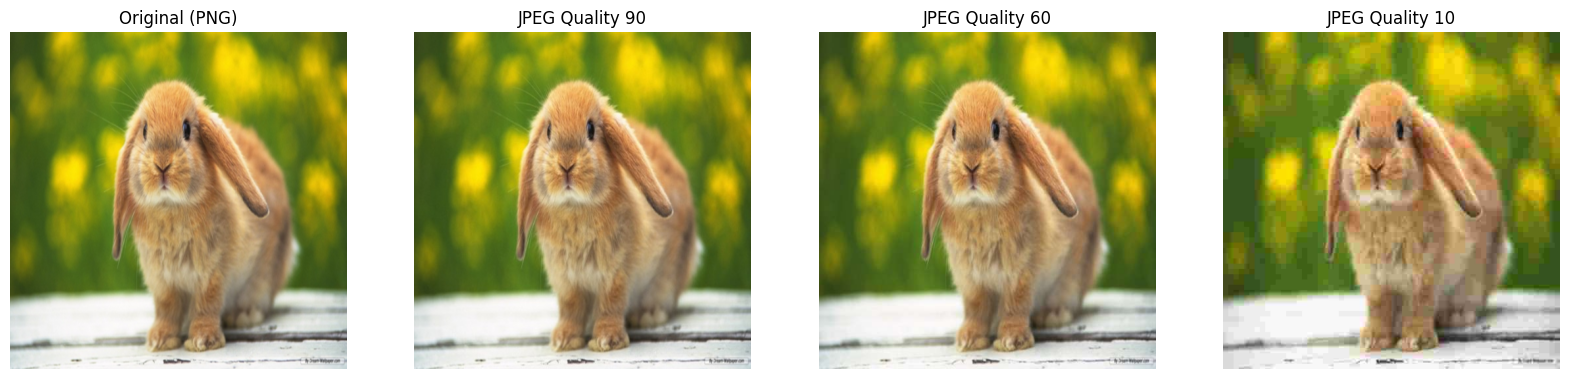

JPEG Quality 90: Compression Ratio = 8.40, Relative Data Redundancy = 0.88
JPEG Quality 60: Compression Ratio = 18.66, Relative Data Redundancy = 0.95
JPEG Quality 10: Compression Ratio = 48.14, Relative Data Redundancy = 0.98


In [6]:
from PIL import Image
import os
import matplotlib.pyplot as plt
#(a)
# Load the original image
img = Image.open('images/bunny.png')
# Save the image with different JPEG quality factors
img.save('b90.jpg', quality=90)
img.save('b60.jpg', quality=60)
img.save('b10.jpg', quality=10)

#(b)
# Load compressed images
img_b90 = Image.open('b90.jpg')
img_b60 = Image.open('b60.jpg')
img_b10 = Image.open('b10.jpg')

# Plot all images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title('Original (PNG)')
axs[0].axis('off')

axs[1].imshow(img_b90)
axs[1].set_title('JPEG Quality 90')
axs[1].axis('off')

axs[2].imshow(img_b60)
axs[2].set_title('JPEG Quality 60')
axs[2].axis('off')

axs[3].imshow(img_b10)
axs[3].set_title('JPEG Quality 10')
axs[3].axis('off')

plt.show()

#(c)
# Get file sizes
size_png = os.path.getsize('images/bunny.png')
size_b90 = os.path.getsize('b90.jpg')
size_b60 = os.path.getsize('b60.jpg')
size_b10 = os.path.getsize('b10.jpg')

# Calculate Compression Ratio and Relative Data Redundancy
def calculate_cr_rdr(original_size, compressed_size):
    cr = original_size / compressed_size
    rdr = 1 - (1 / cr)
    return cr, rdr

# Compute
cr_b90, rdr_b90 = calculate_cr_rdr(size_png, size_b90)
cr_b60, rdr_b60 = calculate_cr_rdr(size_png, size_b60)
cr_b10, rdr_b10 = calculate_cr_rdr(size_png, size_b10)

# Display results
print(f'JPEG Quality 90: Compression Ratio = {cr_b90:.2f}, Relative Data Redundancy = {rdr_b90:.2f}')
print(f'JPEG Quality 60: Compression Ratio = {cr_b60:.2f}, Relative Data Redundancy = {rdr_b60:.2f}')
print(f'JPEG Quality 10: Compression Ratio = {cr_b10:.2f}, Relative Data Redundancy = {rdr_b10:.2f}')



 ### (2) Fidelity Criteria 
(a) Load the saved JPEG images. Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 

(b) Implement a SSIM function by yourself according to [1].

[1] Wang Z, Bovik AC, Sheikh HR, Simoncelli EP. Image quality assessment: from error visibility to structural similarity. IEEE Trans Image Process. 2004 Apr;13(4):600-12.

In [9]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import numpy as np

# Load images again as arrays
img_orig = np.array(Image.open('images/bunny.png').convert('RGB'))   # turn to RGB
img_b90 = np.array(Image.open('b90.jpg').convert('RGB'))
img_b60 = np.array(Image.open('b60.jpg').convert('RGB'))
img_b10 = np.array(Image.open('b10.jpg').convert('RGB'))

# Define function to compute metrics
def calculate_metrics(original, compressed):
    mse = mean_squared_error(original, compressed)
    psnr = peak_signal_noise_ratio(original, compressed, data_range=255)
    ssim_value, ssim_map = structural_similarity(original, compressed, channel_axis=-1, data_range=255, full=True)
    return mse, psnr, ssim_value, ssim_map

# Compute for each JPEG
mse_b90, psnr_b90, ssim_b90, ssim_map_b90 = calculate_metrics(img_orig, img_b90)
mse_b60, psnr_b60, ssim_b60, ssim_map_b60 = calculate_metrics(img_orig, img_b60)
mse_b10, psnr_b10, ssim_b10, ssim_map_b10 = calculate_metrics(img_orig, img_b10)

# Display results
print("JPEG Quality 90:")
print(f"  MSE: {mse_b90:.2f}, PSNR: {psnr_b90:.2f} dB, SSIM: {ssim_b90:.4f}")

print("JPEG Quality 60:")
print(f"  MSE: {mse_b60:.2f}, PSNR: {psnr_b60:.2f} dB, SSIM: {ssim_b60:.4f}")

print("JPEG Quality 10:")
print(f"  MSE: {mse_b10:.2f}, PSNR: {psnr_b10:.2f} dB, SSIM: {ssim_b10:.4f}")


JPEG Quality 90:
  MSE: 2.96, PSNR: 43.41 dB, SSIM: 0.9804
JPEG Quality 60:
  MSE: 8.69, PSNR: 38.74 dB, SSIM: 0.9540
JPEG Quality 10:
  MSE: 62.48, PSNR: 30.17 dB, SSIM: 0.8097


### (3) Simulation of a Part of JPEG Compression
(a) Load the grayscale image lenagray.tiff.

(b) Shift the pixel intensity by -128. 

(c) Divide the image into non-overlapped 8$*$8 subimages and perform 8$*$8 block DCT on each subimage. (Tips: ``cv2.dct`` or ``scipy.fftpack.dct``)

(d) Use a quantization table with QF=50 for quantization. 

(e) Perform lossless predictive coding (difference coding) of DC coefficients by using the coefficient in the previous subimage as reference (a raster scan mannar).  

(f) Sort 63 AC coefficients in each block in a ZigZag order. Converted them into a one-dimensional vector. 

(g) Save all the compressed data into a Numpy data format (refered to as NPY/NPZ (.npy or .npz) file)  (Tips: ``np.save`` or ``np.savez``).

(h) Compress the npy/npz file to a zip file (refered to as NPZzip). Compress the TIFF image to another zip file (refered to as TIFFzip) (Tips: ``zipfile.Zipfile``, ``zipfile.write``, ``zipfile.close``. For more details please refer to https://docs.python.org/3/library/zipfile.html and https://cloud.tencent.com/developer/article/1431438).

(i) Calculate the Compression Ratio between the TIFF image and the NPY/NPZ file according to the file sizes. Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.

(j) Load the above saved file. Decode it to a recovered image.

(k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side.

``quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)``

(512, 512)
Compression Ratio (TIFF/NPZ): 0.25
Compression Ratio (TIFF/NPZzip): 0.25
Compression Ratio (TIFFzip/NPZzip): 0.25
MSE: 1070.45
PSNR: 17.84 dB


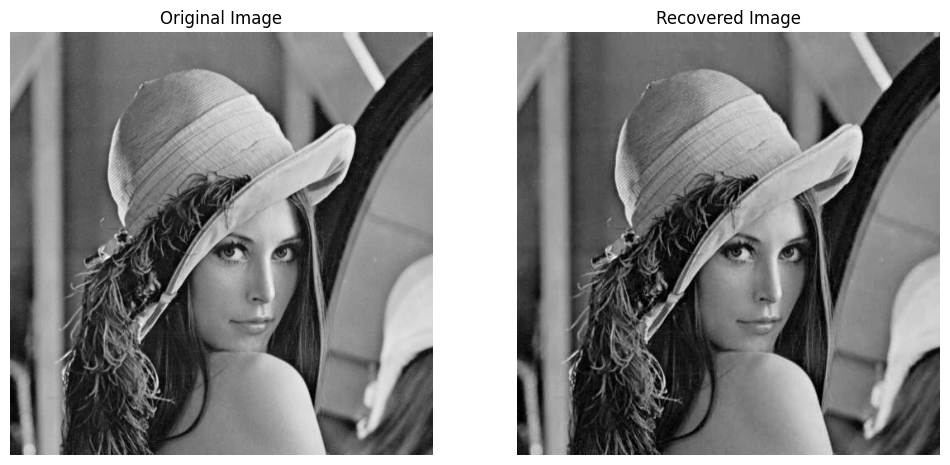

In [11]:
import numpy as np
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

#(a)
# Load grayscale image
img = cv2.imread('images/lenagray.tiff', cv2.IMREAD_GRAYSCALE)
print(img.shape)  

#(b)shift -128
img_shifted = img.astype(np.float32) - 128

#(c)
#divide into 8x8
def block_process(img, block_size=8):
    h, w = img.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

# Perform block division
blocks = block_process(img_shifted)

# Apply DCT
dct_blocks = [cv2.dct(block) for block in blocks]

#(d)
# Quantization table provided
quantization_table = np.array([
    [16,11,10,16,24,40,51,61],
    [12,12,14,19,26,58,60,55],
    [14,13,16,24,40,57,69,56],
    [14,17,22,29,51,87,80,62],
    [18,22,37,56,68,109,103,77],
    [24,35,55,64,81,104,113,92],
    [49,64,78,87,103,121,120,101],
    [72,92,95,98,112,100,103,99]
], dtype=np.float32)

# Quantize each DCT block
quantized_blocks = [np.round(dct_block / quantization_table) for dct_block in dct_blocks]

#(e)
# Extract DC coefficients
dc_coeffs = np.array([block[0, 0] for block in quantized_blocks])

# Predictive coding (difference coding)
dc_diffs = np.diff(dc_coeffs, prepend=dc_coeffs[0])

#(f)
# Zigzag order index
def zigzag_indices(N=8):
    index_order = sorted(((x, y) for x in range(N) for y in range(N)),
                         key=lambda s: (s[0]+s[1], -s[0] if (s[0]+s[1])%2 else s[0]))
    return index_order

zigzag_order = zigzag_indices()

def zigzag_scan(block):
    result = []
    for (x, y) in zigzag_order:
        result.append(block[x, y])
    return result

# Extract AC coefficients (after removing the DC component at index 0)
ac_coeffs = []
for block in quantized_blocks:
    zz = zigzag_scan(block)
    ac_coeffs.append(zz[1:])  # Skip the first DC coefficient

#(g)
# Save compressed data
np.savez('compressed_data.npz', dc_diffs=dc_diffs, ac_coeffs=ac_coeffs)

#(h)
# Compress npz to zip
with zipfile.ZipFile('compressed_data_zip.zip', 'w') as zipf:
    zipf.write('compressed_data.npz')

# Compress TIFF to zip
with zipfile.ZipFile('lenagray_zip.zip', 'w') as zipf:
    zipf.write('images/lenagray.tiff')

#(i)
size_tiff = os.path.getsize('images/lenagray.tiff')
size_npz = os.path.getsize('compressed_data.npz')
size_npzzip = os.path.getsize('compressed_data_zip.zip')
size_tiffzip = os.path.getsize('lenagray_zip.zip')

# Compression ratios
cr_tiff_to_npz = size_tiff / size_npz
cr_tiff_to_npzzip = size_tiff / size_npzzip
cr_tiffzip_to_npzzip = size_tiffzip / size_npzzip

print(f'Compression Ratio (TIFF/NPZ): {cr_tiff_to_npz:.2f}')
print(f'Compression Ratio (TIFF/NPZzip): {cr_tiff_to_npzzip:.2f}')
print(f'Compression Ratio (TIFFzip/NPZzip): {cr_tiffzip_to_npzzip:.2f}')

#(j)
# Load compressed npz
data = np.load('compressed_data.npz', allow_pickle=True)
dc_diffs = data['dc_diffs']
ac_coeffs = data['ac_coeffs']

# Recover DC coefficients
dc_recovered = np.cumsum(dc_diffs)

# Recover blocks
recovered_blocks = []
for i in range(len(dc_recovered)):
    block = np.zeros((8, 8), dtype=np.float32)
    zz = [dc_recovered[i]] + list(ac_coeffs[i])
    for idx, (x, y) in enumerate(zigzag_order):
        if idx < len(zz):
            block[x, y] = zz[idx]
    # Dequantize
    block = block * quantization_table
    # Inverse DCT
    block = cv2.idct(block)
    recovered_blocks.append(block)

# Reassemble image
def combine_blocks(blocks, img_shape, block_size=8):
    h, w = img_shape
    img = np.zeros((h, w), dtype=np.float32)
    idx = 0
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            img[i:i+block_size, j:j+block_size] = blocks[idx]
            idx += 1
    return img

img_recovered = combine_blocks(recovered_blocks, img.shape) + 128
img_recovered = np.clip(img_recovered, 0, 255).astype(np.uint8)

#(k)
mse = mean_squared_error(img, img_recovered)
psnr = peak_signal_noise_ratio(img, img_recovered, data_range=255)

print(f'MSE: {mse:.2f}')
print(f'PSNR: {psnr:.2f} dB')

# Display images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(img_recovered, cmap='gray')
axs[1].set_title('Recovered Image')
axs[1].axis('off')

plt.show()


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.